In [68]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial.polynomial import Polynomial as poly
import cmocean
import matplotlib.ticker as tkr
%matplotlib inline
plt.rcParams["font.size"] = 12
plt.rcParams['text.usetex'] = False
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['font.family'] = 'Dejavu Serif'

In [12]:
# define params

loc  = "/scratch/hcm7920/ambData/channelMean/"
loc2 ="/home/hcm7920/experiments/arcticMiddepthBI/analysis/figData/"
conc = ['0','20','40','60','80','100']

nx = 500
ny = 500
nz = 50
dx = 2000
dy = 2000

g = 9.81
rhoConst = 1000


In [4]:
# load data

saltSteady = np.load(loc+"channelMeanSalt.npy")

levs = np.load(loc+"../grid/gridLevs.npy")
levFaces = np.load(loc+"../grid/gridLevs.npy")

adiaFlux = np.load(loc+"channelMeanAdiaAdvFlux.npy")
diabaticFlux = np.load(loc+"channelMeanDiabaticAdvFlux.npy")

adiaFlux = adiaFlux + diabaticFlux


In [5]:
print(adiaFlux[1,:,:,0].min(),
      adiaFlux[1,:,:,0].max(),
      diabaticFlux[1,:,:,0].max(),
      diabaticFlux[1,:,:,0].min())

-1.9514757193314417e-05 3.298469483060984e-05 0.005474836099768447 -0.0044157220271492


### Calculate $\overline{v's'} / \partial_y \overline{s}$

In [6]:
# use modified VSbar DsaltDy kappaCalc from calcadvfluxdecomp.ipynb
DsaltDy = np.gradient(saltSteady,dy,axis=1)[:,100:-100,:]
VSbar = adiaFlux[0,:,100:-100,:]
kappaCalc =  VSbar / DsaltDy
kappaCalc = kappaCalc


/state/partition1/job-49544103/ipykernel_1949953/2817390148.py:4: RuntimeWarning: divide by zero encountered in divide
  kappaCalc =  VSbar / DsaltDy


### Plot contour of the results

In [7]:
# dI = 29
# contourLevs = np.linspace(25,10e3,100)
# yGrid = np.linspace(-498,498,500)[100:-100]

# plt.figure(figsize=(6,3.75),layout="constrained")
# plt.contourf(yGrid,levs[:dI],-kappaCalc[:dI,:,-1],contourLevs,
#             cmap=cmocean.cm.thermal)
# plt.colorbar()
# plt.title("$-\overline{v's'} / \partial_y \overline{s}$, 100% concentration")

In [8]:
# dI = 29
# contourLevs = np.linspace(0,10e3,100)
# yGrid = np.linspace(-498,498,500)[100:-100]

# plt.figure(figsize=(6,3.75),layout="constrained")
# plt.contourf(yGrid,levs[:dI],-kappaCalc[:dI,:,0],contourLevs,
#             cmap=cmocean.cm.thermal)
# plt.colorbar()
# plt.title("$-\overline{v's'} / \partial_y \overline{s}$, 0% concentration")

In [9]:
# dI = 29
# contourLevs = np.linspace(0,10e3,100)
# yGrid = np.linspace(-498,498,500)[100:-100]

# plt.figure(figsize=(6,3.75),layout="constrained")
# plt.contourf(yGrid,levs[:dI],-kappaCalc[:dI,:,2],contourLevs,
#             cmap=cmocean.cm.thermal)
# plt.colorbar()
# plt.title("$-\overline{v's'} / \partial_y \overline{s}$, 40% concentration")

### Scatter plots
### And fit lines

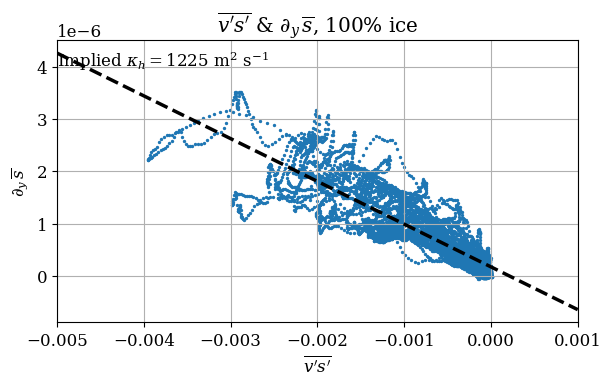

In [10]:
sI = 2
dI = 29
xData = np.ravel(VSbar[sI:dI,:,-1])
yData = np.ravel(DsaltDy[sI:dI,:,-1])
xData[(xData>=0) & (yData>=0)] = 0
yData[(xData>=0) & (yData>=0)] = 0

plt.figure(figsize=(6,3.75),layout="constrained")
plt.grid(visible=True)
ax = plt.gca()
# ax.set_axisbelow(True)
plt.scatter(xData,yData,s=2)
plt.xlim([-0.005,0.001])
plt.xlabel("$\overline{v's'}$")
plt.ylabel("$\partial_y \, \overline{s}$")
plt.title("$\overline{v's'}$ & $\partial_y \, \overline{s}$, 100% ice")


seriesFit = poly.fit(xData,yData,[0,1],full=True)
lineFit = seriesFit[0].linspace(5,[-0.005,0.001])
coefFit = seriesFit[0].convert().coef
myText = f"Implied $\kappa_h = ${round(-1/coefFit[-1])}"
myText += " $\mathrm{m}^2$ $\mathrm{s}^{-1}$"
plt.text(-0.005,4e-6,myText)
plt.plot(lineFit[0],lineFit[1],color='k',linestyle='dashed',linewidth=2.5)

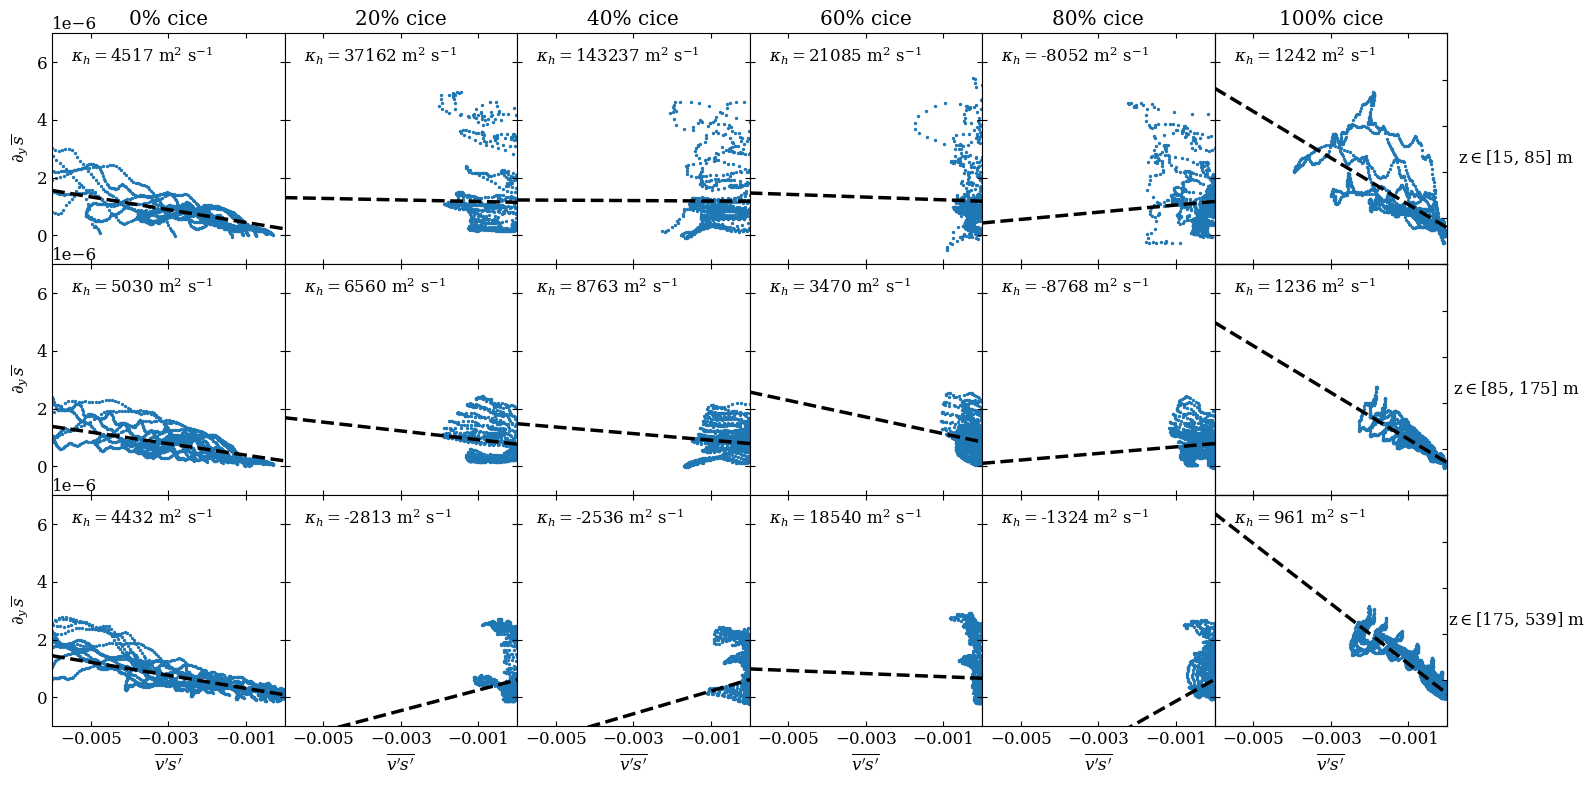

In [74]:
depthBounds = [1,8,17,31]
fig,axs = plt.subplots(nrows=len(depthBounds)-1,ncols=len(conc),
                       sharex=True,sharey=True,figsize=(18,9),
                       squeeze=False)
plt.subplots_adjust(wspace=0,hspace=0)

for iceIndex in range(len(conc)):
  for depthIndex in range(len(depthBounds)-1):
    sI = depthBounds[depthIndex]
    dI = depthBounds[depthIndex+1]
    xData = np.ravel(VSbar[sI:dI,:,iceIndex])
    yData = np.ravel(DsaltDy[sI:dI,:,iceIndex])
    # xData[(xData>=0) & (yData>=0)] = 0
    # yData[(xData>=0) & (yData>=0)] = 0

    axs[depthIndex,iceIndex].scatter(xData,yData,s=2)
    axs[depthIndex,iceIndex].set_xlim([-0.006,0.00])
    axs[depthIndex,iceIndex].set_ylim([-1e-6,7e-6])
    
    seriesFit = poly.fit(xData,yData,[0,1],full=True)
    lineFit = seriesFit[0].linspace(5,[-0.006,0.001])
    coefFit = seriesFit[0].convert().coef
    myText = f"$\kappa_h = ${round(-1/coefFit[-1])}"
    myText += " $\mathrm{m}^2$ $\mathrm{s}^{-1}$"
    axs[depthIndex,iceIndex].text(-0.0055,6e-6,myText)
    axs[depthIndex,iceIndex].plot(lineFit[0],lineFit[1],color='k',linestyle='dashed',linewidth=2.5)

    # axs[depthIndex,iceIndex].grid(visible=True)
    axs[depthIndex,iceIndex].tick_params(axis="both",direction="in",
                                        right=True,top=True)
    axs[depthIndex,iceIndex].xaxis.set_major_locator(tkr.FixedLocator([-5e-3,-3e-3,-1e-3]))


for iceIndex in range(len(conc)):
  axs[0,iceIndex].set_title(f"{conc[iceIndex]}% cice")
  axs[-1,iceIndex].set_xlabel("$\overline{v's'}$")
for depthIndex in range(len(depthBounds)-1):
  axs[depthIndex,0].set_ylabel("$\partial_y \, \overline{s}$")
  twinAx = axs[depthIndex,-1].twinx()
  twinAx.set_ylabel("z$\in$"+f"[{-levs[depthBounds[depthIndex]]:.0f}, {-levs[depthBounds[depthIndex+1]]:.0f}] m",
                    rotation='horizontal',labelpad=50)
  twinAx.tick_params(labelright=False,direction="in")
# axs[-1,0].xaxis.set_major_locator(tkr.FixedLocator([-6e-3,-4e-3,-2e-3,0]))
  

In [ ]:
coefFit

In [ ]:
dI = 29
xData = np.ravel(VSbar[sI:dI,:,0])
yData = np.ravel(DsaltDy[sI:dI,:,0])

plt.figure(figsize=(6,3.75),layout="constrained")
plt.scatter(xData,yData,s=2)
plt.xlabel("$\overline{v's'}$")
plt.ylabel("$\partial_y \, \overline{s}$")
plt.title("$\overline{v's'}$ & $\partial_y \, \overline{s}$, 0% ice")

seriesFit = poly.fit(xData,yData,1)
lineFit = seriesFit.linspace(5)
coefFit = seriesFit.convert().coef
myText = f"Implied $\kappa_h = ${round(-1/coefFit[1])}"
myText += " $\mathrm{m}^2$ $\mathrm{s}^{-1}$"
plt.text(-0.0075,5e-6,myText)
plt.plot(lineFit[0],lineFit[1],color='k',linestyle='dashed',linewidth=2.5)


In [ ]:
seriesFit.convert().coef

In [ ]:
# divided into depth levels

In [ ]:
# 0% sea ice 

depthIntervals = [5,5,5,5,5,2,2]
startIndex = 0
for addIndex in depthIntervals:
  endIndex = startIndex + addIndex
  xData = np.ravel(VSbar[startIndex:endIndex,:,0])
  yData = np.ravel(DsaltDy[startIndex:endIndex,:,0])
  
  seriesFit = poly.fit(xData,yData,1)
  lineFit = seriesFit.linspace(5)
  coefFit = seriesFit.convert().coef
  myText = f"Implied $\kappa_h = ${round(-1/coefFit[1])}"
  myText += " $\mathrm{m}^2$ $\mathrm{s}^{-1}$"

  plt.figure(figsize=(6,3.75),layout="constrained")
  plt.plot(lineFit[0],lineFit[1],color='k',linestyle='dashed',linewidth=2.5)
  plt.scatter(xData,yData,s=2)
  plt.xlabel("$\overline{v's'}$")
  plt.ylabel("$\partial_y \, \overline{s}$")
  plt.title(f"  {-levs[startIndex]:.0f} m to {-levs[endIndex]:.0f} m, "
           +myText)

  startIndex = endIndex * 1

In [ ]:
# 100% sea ice

depthIntervals = [5,5,5,5,5,5,5]
startIndex = 0
for addIndex in depthIntervals:
  endIndex = startIndex + addIndex
  xData = np.ravel(VSbar[startIndex:endIndex,:,-1])
  yData = np.ravel(DsaltDy[startIndex:endIndex,:,-1])

  yData[xData>0] = 0
  xData[xData>0] = 0
  
  seriesFit = poly.fit(xData,yData,1)
  lineFit = seriesFit.linspace(5)
  coefFit = seriesFit.convert().coef
  myText = f"Implied $\kappa_h = ${round(-1/coefFit[1])}"
  myText += " $\mathrm{m}^2$ $\mathrm{s}^{-1}$"

  plt.figure(figsize=(6,3.75),layout="constrained")
  plt.plot(lineFit[0],lineFit[1],color='k',linestyle='dashed',linewidth=2.5)
  plt.scatter(xData,yData,s=2)
  plt.xlabel("$\overline{v's'}$")
  plt.ylabel("$\partial_y \, \overline{s}$")
  plt.title(f"  {-levs[startIndex]:.0f} m to {-levs[endIndex]:.0f} m, "
           +myText)

  startIndex = endIndex * 1